# Week 4 handin


Use only numpy (not pandas) in these exercises

## Exercise 1

In [1]:
import numpy as np

filename = '/home/jovyan/data/befkbhalderstatkode.csv'

bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

# Value of the area code (second column, index 1): print(neighb[1])
neighb

{1: 'Indre By',
 2: 'Østerbro',
 3: 'Nørrebro',
 4: 'Vesterbro/Kgs. Enghave',
 5: 'Valby',
 6: 'Vanløse',
 7: 'Brønshøj-Husum',
 8: 'Bispebjerg',
 9: 'Amager Øst',
 10: 'Amager Vest',
 99: 'Udenfor'}

##### 3. Find out how many people lived in each of the 11 areas in 2015

In [15]:
dd = bef_stats_df

mask_year = dd[:,0] == 2015
year_arr = dd[mask_year]

people_amount = {}

for key in neighb:
    people_amount[neighb[key]] = year[year[:,1] == key][:,-1].sum()
    
people_amount


{'Indre By': 51937,
 'Østerbro': 75113,
 'Nørrebro': 78802,
 'Vesterbro/Kgs. Enghave': 61623,
 'Valby': 51727,
 'Vanløse': 39537,
 'Brønshøj-Husum': 43908,
 'Bispebjerg': 53604,
 'Amager Øst': 55205,
 'Amager Vest': 64967,
 'Udenfor': 3872}

##### 4. Make a bar plot to show the size of each city area from the smallest to the largest

dict_keys(['Udenfor', 'Vanløse', 'Brønshøj-Husum', 'Valby', 'Indre By', 'Bispebjerg', 'Amager Øst', 'Vesterbro/Kgs. Enghave', 'Amager Vest', 'Østerbro', 'Nørrebro'])


<function matplotlib.pyplot.show(*args, **kw)>

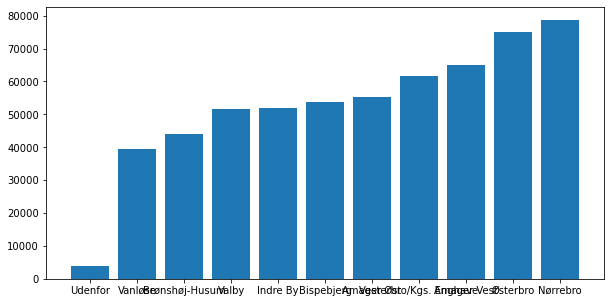

In [54]:
# Asuming by 'size' it means the size of the population

import matplotlib.pylab as plt

sorted_as_tuples = sorted(people_amount.items(), key=lambda item: item[1])
people_amount = {k: v for k, v in sorted_as_tuples}

plt.figure(figsize = (10, 5))
plt.bar(people_amount.keys(), people_amount.values())
plt.show

##### 5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

In [22]:
over_65 = dd[(dd[:, 2] > 65) & mask_year]

print('Over 65:', over_65[:, -1].sum())

# bool_mask = (dd[:,0] == 2015) & (dd[:,2] > 65)
# # Alder: col 2 = 65
# # copenhagen: col 1 = sum of 1-10
# # aar: col 0 = 2015
# old_people = np.sum(dd[bool_mask][:,4])
# print('There are',old_people, 'people living in CPH over the age of 65.')

Over 65: 55750


##### 6. How many of those were from the other nordic countries (not dk)

In [24]:
north = [5101, 5104, 5106, 5107, 5110, 5120, 5901, 5902]
print('From the north:', over_65[np.in1d(over_65[:, 3], north)][:, -1].sum())

From the north: 608


##### 7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

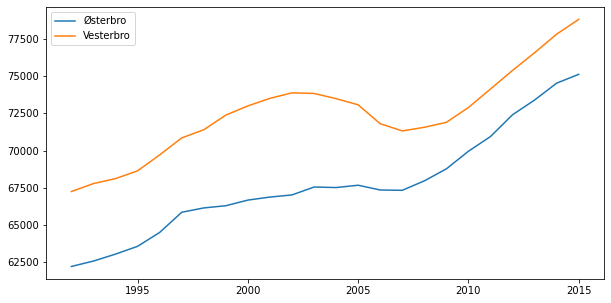

[47854, 47589, 47538, 47633, 47734, 48275, 49109, 49520, 50312, 50756, 51039, 51045, 50869, 50643, 50303, 50964, 51466, 53351, 55315, 57150, 58411, 59211, 60328, 61623]


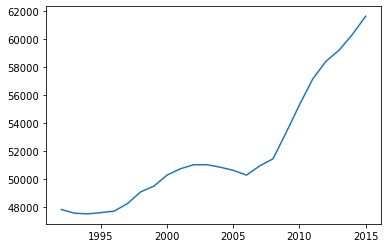

In [28]:
# Change in vesterbro 1992 to 2015 as list:

years = np.arange(1992,2016)

cities = [2,3]
for c in range(len(cities)):
    years_dict = {}
    for year in years:
        years_dict[year] = dd[(dd[:,0] == year) & (dd[:, 1] == cities[c])][:, -1].sum()
    cities[c] = years_dict

x,y = zip(*sorted(cities[0].items()))
x1,y1 = zip(*sorted(cities[1].items()))

plt.figure(figsize = (10, 5))
plt.plot(x,y, label='Østerbro')
plt.plot(x1,y1, label='Vesterbro')

plt.legend()
plt.show()

# vesterbro = []
# numberV = 0

# for y in years:
#     maskV = (dd[:,1] == 4) & (dd[:,0] == y)
#     numberV = np.sum(dd[maskV][:,4])
#     vesterbro.append(numberV)

# print(vesterbro)

# plt.plot(years, vesterbro)
# plt.show()


## Exercise 2

In [34]:
# 1+2 clean up the data so it only contains numbers

import csv

with open('/home/jovyan/data/FOLK1A.csv') as file, open("demografic_cleaned.csv", 'w') as outfile:
    csv_reader = csv.reader(file, delimiter=';')
    next(csv_reader, None)
    for row in csv_reader:
        row[3] = row[3][0: -2]
        outfile.writelines(';'.join(row) + '\n')


In [50]:
# 3 Now load your demographic data with numpy.

with open('./demografic_cleaned.csv') as file:
    data = np.loadtxt(file, delimiter = ';', dtype = np.uint)
data

array([[    0,     1,     0,  2008, 32976],
       [    0,     1,     0,  2009, 33656],
       [    0,     1,     0,  2010, 32435],
       ...,
       [  751,     2,   100,  2018,    18],
       [  751,     2,   100,  2019,    21],
       [  751,     2,   100,  2020,    23]], dtype=uint64)

In [49]:
# 4 Use file: BY_KODER_demographics.csv to get cities from the city codes

with open('../data/DKstat_bykoder.csv') as f:
    cities = np.genfromtxt(f, delimiter = ';', dtype = ['<i8', 'U15'])
cities

array([(  0, ' Hele-landet'), ( 84, ' Region-Hovedst'),
       (101, ' København'), (147, ' Frederiksberg'), (155, ' Dragør'),
       (185, ' Tårnby'), (165, ' Albertslund'), (151, ' Ballerup'),
       (153, ' Brøndby'), (157, ' Gentofte'), (159, ' Gladsaxe'),
       (161, ' Glostrup'), (163, ' Herlev'), (167, ' Hvidovre'),
       (169, ' Høje-Taastrup'), (183, ' Ishøj'), (173, ' Lyngby-Taarbæk'),
       (175, ' Rødovre'), (187, ' Vallensbæk'), (201, ' Allerød'),
       (240, ' Egedal'), (210, ' Fredensborg'), (250, ' Frederikssund'),
       (190, ' Furesø'), (270, ' Gribskov'), (260, ' Halsnæs'),
       (217, ' Helsingør'), (219, ' Hillerød'), (223, ' Hørsholm'),
       (230, ' Rudersdal'), (400, ' Bornholm'), (411, ' Christiansø'),
       ( 85, ' Region-Sjællan'), (253, ' Greve'), (259, ' Køge'),
       (350, ' Lejre'), (265, ' Roskilde'), (269, ' Solrød'),
       (320, ' Faxe'), (376, ' Guldborgsund'), (316, ' Holbæk'),
       (326, ' Kalundborg'), (360, ' Lolland'), (370, ' Næstved

In [53]:
# 5 Now find out which city in 2020 has the highest percentage of men (gender code 1), returning pct_male

import math

mask_men_2020 = data[(data[:, 1] == 1) & (data[:, 3] == 2020)]
mask_women_2020 = data[(data[:, 1] == 2) & (data[:, 3] == 2020)]


def summed_by_city(city_code):
    men = mask_men_2020[mask_men_2020[:, 0] == city_code][:, -1].sum()
    women = mask_women_2020[mask_women_2020[:, 0] == city_code][:, -1].sum()
    res = men/(women+men)*100
    return res

cities_p_men = {}
for city in cities:
    res = summed_by_city(city[0])
    if not math.isnan(res):
        cities_p_men[city[1]] = res
#print(type(cities_p_men))
sorted_as_tuples = sorted(cities_p_men.items(), key = lambda item: item[1])
cities_p_men = {k: v for k, v in sorted_as_tuples}
cities_p_men



dict_items([(' Hele-landet', 49.74934737912075), (' Region-Hovedst', 49.083098029814195), (' Frederiksberg', 47.42871022589264), (' Bornholm', 49.49680715197957), (' Region-Sjællan', 49.853303447127715), (' Region-Syddanm', 50.00499964052172), (' Odense', 49.51125446331696), (' Esbjerg', 50.138736925029534), (' Region-Midtjyl', 50.03713192125288), (' Aarhus', 49.127060264915976), (' Region-Nordjyl', 50.505567840986366), (' Aalborg', 50.41119110374309)])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in ulong_scalars
  if sys.path[0] == '':


{' Frederiksberg': 47.42871022589264,
 ' Region-Hovedst': 49.083098029814195,
 ' Aarhus': 49.127060264915976,
 ' Bornholm': 49.49680715197957,
 ' Odense': 49.51125446331696,
 ' Hele-landet': 49.74934737912075,
 ' Region-Sjællan': 49.853303447127715,
 ' Region-Syddanm': 50.00499964052172,
 ' Region-Midtjyl': 50.03713192125288,
 ' Esbjerg': 50.138736925029534,
 ' Aalborg': 50.41119110374309,
 ' Region-Nordjyl': 50.505567840986366}

No handles with labels found to put in legend.


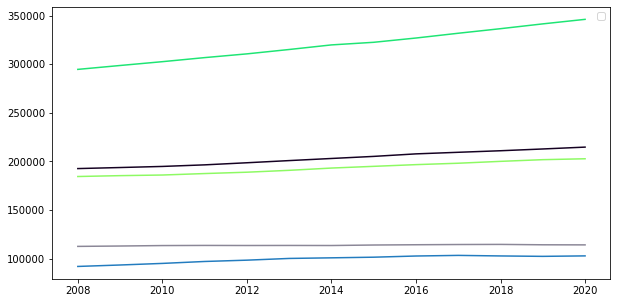

In [48]:
# 6 Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020

import random as random

def people_in_city(city_code):
    res = {year: data[(data[:, 0] == city_code) & (data[:, 3] == year)][:, 4].sum() for year in np.arange(2008, 2021)}
    return res

cities_in_list = []

for d in data[:, 0]:
    if not cities_in_list.__contains__(d): 
        cities_in_list.append(d)

persons_in_city = {city[1].strip(' '): 
    people_in_city(city[0]) 
    for city in cities if city[0] in cities_in_list
    }

non_cities = ['Hele-landet', 'Region-Hovedst', 'Region-Midtjyl', 'Region-Syddanm', 'Region-Sjællan', 'Region-Nordjyl']
for non_city in non_cities:
    persons_in_city.pop(non_city)

# sort list
sorted_as_tuples = sorted(persons_in_city.items(), key = lambda item: item[1][2020], reverse=True)
sorted_as_tuples = sorted_as_tuples[:5]

plt.figure(figsize=(10, 5))
for k, v in sorted_as_tuples:
    plt.plot(list(v.keys()), list(v.values()), marker='', color=[random.random(), random.random(), random.random()])
plt.legend()


